<h1>Analysis of Variance (ANOVA)</h1>
<i>Source: Wikipedia</i>

<p>Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample.</p>

<p>ANOVA was developed by statistician and evolutionary biologist Ronald Fisher.</p>

<p>In the ANOVA setting, the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether the population means of several groups are equal, and therefore generalizes the t-test to more than two groups.</p>

<p>ANOVA is useful for comparing (testing) three or more group means for statistical significance. It is conceptually similar to multiple two-sample t-tests, but is more conservative, resulting in fewer type I errors,[1] and is therefore suited to a wide range of practical problems.</p>

In [26]:
#!pip3 install numpy

In [3]:
import numpy as np

In [8]:
# Xe: economics, Xm: medicine, Xh: history

Xe = [42, 43, 44, 45, 49, 52, 53, 53, 54]
Xm = [54, 55, 56, 58, 64, 64, 69]
Xh = [35, 39, 39, 40, 40, 42, 50, 53, 55]

In [11]:
#!pip3 install  matplotlib

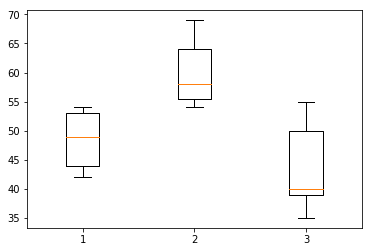

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([Xe, Xm, Xh])
plt.show()

In [17]:
Xe_count = len(Xe)
Xe_sum = sum(Xe)
Xe_mean = np.mean(Xe)
Xe_var = np.var(Xe, ddof = 1)
Xe_std = np.std(Xe, ddof = 1)
Xe_sse = sum((Xe - Xe_mean)**2)

print('count:', Xe_count)
print('sum:', Xe_sum)
print('mean:', Xe_mean)
print('var:', Xe_var)
print('std:', Xe_std)
print('SSE:', Xe_sse)

count: 9
sum: 435
mean: 48.333333333333336
var: 23.5
std: 4.847679857416329
SSE: 188.0


In [18]:
Xm_count = len(Xm)
Xm_sum = sum(Xm)
Xm_mean = np.mean(Xm)
Xm_var = np.var(Xm, ddof = 1)
Xm_std = np.std(Xm, ddof = 1)
Xm_sse = sum((Xm - Xm_mean)**2)

print('count:', Xm_count)
print('sum:', Xm_sum)
print('mean:', Xm_mean)
print('var:', Xm_var)
print('std:', Xm_std)
print('SSE:', Xm_sse)

count: 7
sum: 420
mean: 60.0
var: 32.333333333333336
std: 5.686240703077327
SSE: 194.0


In [19]:
Xh_count = len(Xh)
Xh_sum = sum(Xh)
Xh_mean = np.mean(Xh)
Xh_var = np.var(Xh, ddof = 1)
Xh_std = np.std(Xh, ddof = 1)
Xh_sse = sum((Xh - Xh_mean)**2)

print('count:', Xh_count)
print('sum:', Xh_sum)
print('mean:', Xh_mean)
print('var:', Xh_var)
print('std:', Xh_std)
print('SSE:', Xh_sse)

count: 9
sum: 393
mean: 43.666666666666664
var: 50.5
std: 7.106335201775948
SSE: 404.0


In [22]:
#!pip3 install scipy

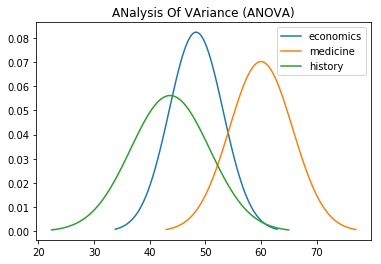

In [25]:
import scipy.stats as stats

mu = Xe_mean
variance = Xe_var
sigma = Xe_std
x = np.linspace(mu - 3*sigma, mu +3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'economics')

mu = Xm_mean
variance = Xm_var
sigma = Xm_std
x = np.linspace(mu - 3*sigma, mu +3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'medicine')

mu = Xh_mean
variance = Xh_var
sigma = Xh_std
x = np.linspace(mu - 3*sigma, mu +3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'history')

plt.title('ANalysis Of VAriance (ANOVA)')
plt.legend()
plt.show()

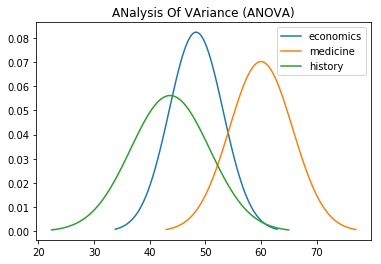

In [28]:
def plot_normaldist(mu, var, sigma, series_name):
    x = np.linspace(mu - 3*sigma, mu +3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label = series_name)

plot_normaldist(Xe_mean, Xe_var, Xe_std, 'economics')
plot_normaldist(Xm_mean, Xm_var, Xm_std, 'medicine')
plot_normaldist(Xh_mean, Xh_var, Xh_std, 'history')
  
plt.title('ANalysis Of VAriance (ANOVA)')
plt.legend()
plt.show()

In [32]:
X = np.concatenate((Xe, Xm, Xh))
X_count = len(X)
X_sum = sum(X)
X_mean = np.mean(X)
X_var = np.var(X, ddof = 1)
X_std = np.std(X, ddof = 1)
X_sse = sum((X - X_mean)**2)

# SST Sum of Square Columns Total
SST = X_sse

# SSE (or SSW) Sum of Square Error (Within)
SSE = Xe_sse + Xm_sse + Xh_sse

# SSC Sum of Square Columns (Between)
SSC = SST - SSE

print('obs:', X_count)
print('total_sum:', X_sum)
print('mean:', X_mean)
print('var:', X_var)
print('std:', X_std)
print('SSE:', SSE, 'SSC:', SSC, 'SST:', SST)

obs: 25
total_sum: 1248
mean: 49.92
var: 77.99333333333334
std: 8.831383432584802
SSE: 786.0 SSC: 1085.8400000000001 SST: 1871.8400000000001


In [33]:
# Groups/Columns
C = 3

# Observations
N = X_count

In [34]:
# Degrees of Freedom - Between
df_b = C-1

# Degrees of Freedom - Within
df_w = N-C

# Degrees of Freedom - Total
df = df_b + df_w

<b>Calculate the F ratio</b>

It measure the ratio of between-column variance and within-column variance. If there is a real difference between the groups the variance between groups will be significantly larger than the variance within the groups.

In [35]:
# F = Variance between the groups /  Variance within the groups
F = ( SSC / df_b ) / ( SSE /  df_w )
p_value = stats.f.sf( F, df_b, df_w )

# F-crit
F_crit = stats.f.ppf( 0.95, df_b, df_w )

print('F:', F)
print('p-value:', p_value)
print('F-crit:', F_crit)

F: 15.196234096692114
p-value: 7.156357807176245e-05
F-crit: 3.4433567793667237


In [38]:
#!pip3 install pandas

In [42]:
import pandas as pd

data = [['Between Groups', SSC, df_b, SSC/df_b, F, p_value, F_crit],
        ['Within Groups', SSE, df_w, SSE/df_w],
        ['Total', SST, df]]
ANOVA = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'p-value', 'F-crit'])
ANOVA = ANOVA.replace(np.nan, '', regex = True)
ANOVA

,Source of Variation,SS,df,MS,F,p-value,F-crit
0,Between Groups,1085.84,2,542.92,15.1962,7.15636e-05,3.44336
1,Within Groups,786.00,22,35.7273,,,
2,Total,1871.84,24,,,,
